### Gombosuren.A, MUST

### Neural Network for differential equations

Нейрол нетвөрк ашиглан дифференциал тэгшитгэлийн тооцооллыг ойролцоогоор шийдэх аргачлал.

[reference1](https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c)

#### import libs


In [8]:
import autograd.numpy as np;
from autograd import grad; 
import autograd.numpy.random as npr;
from autograd.core import primitive;
from matplotlib import pyplot as plt;

%matplotlib inline

In [9]:
nx = 10;
dx = 1 / nx;

In [10]:
def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3);


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3));


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x);


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2;

<<<  plot  >>>



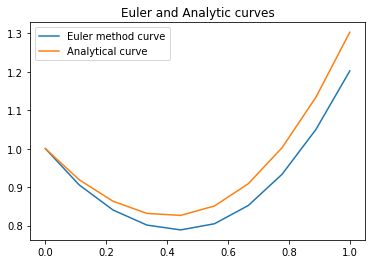

In [17]:
x_space = np.linspace(0, 1, nx);
y_space = psy_analytic(x_space);
psy_fd = np.zeros_like(y_space);
psy_fd[0] = 1. # IC


# euler method;

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx;

print('<<<  plot  >>>\n');  
plt.figure();
plt.plot(x_space, y_space, label = 'Euler method curve');
plt.plot(x_space, psy_fd, label = 'Analytical curve');
plt.title('Euler and Analytic curves');
plt.legend();
plt.show();

In [18]:
# activation function;

def sigmoid(x):
    return 1 / (1 + np.exp(-x));


# gradient of activation function;

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x));


# weight function;

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]));
    return np.dot(a1, W[1]);


# gradient of weight function;

def d_neural_network_dx(W, x, k = 1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x));


# loss function;

def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0];
        psy_t = 1. + xi * net_out;
        d_net_out = d_neural_network_dx(W, xi)[0][0];
        d_psy_t = net_out + xi * d_net_out;
        func = f(xi, psy_t);       
        err_sqr = (d_psy_t - func)**2;

        loss_sum += err_sqr;
    return loss_sum;

In [19]:
W = [npr.randn(1, 10), npr.randn(10, 1)];
lmb = 0.001;

# x = np.array(1);
# print neural_network(W, x);
# print d_neural_network_dx(W, x);

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space);
    
#     print loss_grad[0].shape, W[0].shape;
#     print loss_grad[1].shape, W[1].shape;
    
    W[0] = W[0] - lmb * loss_grad[0];
    W[1] = W[1] - lmb * loss_grad[1];
    
#     print loss_function(W, x_space);

loss:  0.21778326929101843 

weight:  [array([[-0.26549227,  0.3899858 ,  0.47482469, -1.80060271, -0.47740491,
         0.26105923,  0.76270343,  0.48397373,  1.77220659,  0.04999721]]), array([[-1.56449319],
       [ 1.25861227],
       [-1.05559478],
       [-2.11784637],
       [-0.32417829],
       [-0.74865142],
       [ 0.63132515],
       [ 1.23300624],
       [ 0.56962493],
       [-0.20093641]])] 

<<<  plot  >>>



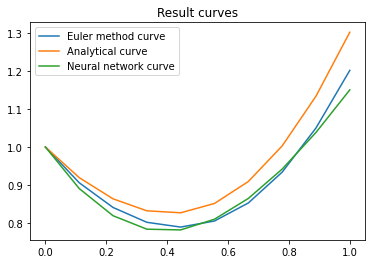

In [21]:
print('loss: ', loss_function(W, x_space), '\n');
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space];

print('weight: ', W, '\n');
print('<<<  plot  >>>\n');
plt.figure();
plt.plot(x_space, y_space, label = 'Euler method curve');
plt.plot(x_space, psy_fd, label = 'Analytical curve');
plt.plot(x_space, res, label = 'Neural network curve');
plt.title('Result curves');
plt.legend();
plt.show();